In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

city_data = []

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [6]:
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4895ee079fa10a4f06d9f1c5ba942d1c


In [8]:
# Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1
    
    #Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hamilton
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | manokwari
Processing Record 4 of Set 1 | murakami
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | deputatskiy
Processing Record 8 of Set 1 | wewak
Processing Record 9 of Set 1 | huilong
Processing Record 10 of Set 1 | avera
Processing Record 11 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 12 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | tessalit
Processing Record 15 of Set 1 | terra rica
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | pisco
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | bud
Processing Record 21 of Set 1 | butaritari
Processing Record 2

Processing Record 39 of Set 4 | kalmunai
Processing Record 40 of Set 4 | vila franca do campo
Processing Record 41 of Set 4 | kruisfontein
Processing Record 42 of Set 4 | catia la mar
Processing Record 43 of Set 4 | tuktoyaktuk
Processing Record 44 of Set 4 | otanche
Processing Record 45 of Set 4 | khatanga
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | krasnoselkup
Processing Record 48 of Set 4 | tazovskiy
Processing Record 49 of Set 4 | san juan del sur
Processing Record 50 of Set 4 | maryborough
Processing Record 1 of Set 5 | ilhabela
Processing Record 2 of Set 5 | moree
Processing Record 3 of Set 5 | broome
Processing Record 4 of Set 5 | caravelas
Processing Record 5 of Set 5 | leh
Processing Record 6 of Set 5 | cacoal
Processing Record 7 of Set 5 | olonets
Processing Record 8 of Set 5 | broken hill
Processing Record 9 of Set 5 | whitefish
Processing Record 10 of Set 5 | hauterive
Processing Record 11 of Set 5 | camacha
Processing Record 12 of Set 5 | satelli

City not found. Skipping...
Processing Record 28 of Set 8 | santa luzia
Processing Record 29 of Set 8 | sibolga
Processing Record 30 of Set 8 | olafsvik
Processing Record 31 of Set 8 | kamenka
Processing Record 32 of Set 8 | barawe
City not found. Skipping...
Processing Record 33 of Set 8 | moose factory
Processing Record 34 of Set 8 | alizai
Processing Record 35 of Set 8 | woodward
Processing Record 36 of Set 8 | arlit
Processing Record 37 of Set 8 | eyl
Processing Record 38 of Set 8 | lourdes
Processing Record 39 of Set 8 | miles city
Processing Record 40 of Set 8 | isangel
Processing Record 41 of Set 8 | catamarca
Processing Record 42 of Set 8 | hitachi
Processing Record 43 of Set 8 | finschhafen
Processing Record 44 of Set 8 | nizhniy tsasuchey
Processing Record 45 of Set 8 | jacareacanga
Processing Record 46 of Set 8 | puerto leguizamo
Processing Record 47 of Set 8 | lakatoro
Processing Record 48 of Set 8 | sabinopolis
Processing Record 49 of Set 8 | ituiutaba
Processing Record 50

Processing Record 19 of Set 12 | do rud
City not found. Skipping...
Processing Record 20 of Set 12 | udimskiy
Processing Record 21 of Set 12 | ondjiva
Processing Record 22 of Set 12 | verkhoyansk
Processing Record 23 of Set 12 | lavrentiya
Processing Record 24 of Set 12 | sitka
Processing Record 25 of Set 12 | raymond
Processing Record 26 of Set 12 | pacifica
Processing Record 27 of Set 12 | vilhena
Processing Record 28 of Set 12 | camana
Processing Record 29 of Set 12 | ibanda
Processing Record 30 of Set 12 | glazov
Processing Record 31 of Set 12 | agua verde
Processing Record 32 of Set 12 | kegayli
City not found. Skipping...
Processing Record 33 of Set 12 | phoenix
Processing Record 34 of Set 12 | anadyr
Processing Record 35 of Set 12 | langsa
Processing Record 36 of Set 12 | yumen
Processing Record 37 of Set 12 | sumter
Processing Record 38 of Set 12 | sergeyevka
Processing Record 39 of Set 12 | luganville
Processing Record 40 of Set 12 | charcas
Processing Record 41 of Set 12 | tu

In [9]:
len(city_data)

578

In [10]:
#Convert the array of dictionaries into a Pandas data frame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hamilton,39.1834,-84.5333,21.58,78,100,1.99,US,2022-02-14 02:00:14
1,Port Alfred,-33.5906,26.8910,68.83,90,58,15.21,ZA,2022-02-14 01:56:36
2,Manokwari,-0.8667,134.0833,82.04,70,100,5.17,ID,2022-02-14 02:00:18
3,Murakami,38.2333,139.4833,37.72,64,61,3.78,JP,2022-02-14 02:00:19
4,Talnakh,69.4865,88.3972,-8.05,70,10,8.79,RU,2022-02-14 02:00:19
5,Hermanus,-34.4187,19.2345,67.89,79,80,17.87,ZA,2022-02-14 01:56:52
6,Deputatskiy,69.3000,139.9000,-11.51,95,98,4.79,RU,2022-02-14 02:00:20
7,Wewak,-3.5534,143.6268,83.16,75,97,2.66,PG,2022-02-14 02:00:20
8,Huilong,31.8111,121.6550,45.99,58,0,10.09,CN,2022-02-14 02:00:22
9,Avera,33.1940,-82.5271,46.71,34,0,15.39,US,2022-02-14 01:57:04


In [11]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hamilton,US,2022-02-14 02:00:14,39.1834,-84.5333,21.58,78,100,1.99
1,Port Alfred,ZA,2022-02-14 01:56:36,-33.5906,26.8910,68.83,90,58,15.21
2,Manokwari,ID,2022-02-14 02:00:18,-0.8667,134.0833,82.04,70,100,5.17
3,Murakami,JP,2022-02-14 02:00:19,38.2333,139.4833,37.72,64,61,3.78
4,Talnakh,RU,2022-02-14 02:00:19,69.4865,88.3972,-8.05,70,10,8.79
5,Hermanus,ZA,2022-02-14 01:56:52,-34.4187,19.2345,67.89,79,80,17.87
6,Deputatskiy,RU,2022-02-14 02:00:20,69.3000,139.9000,-11.51,95,98,4.79
7,Wewak,PG,2022-02-14 02:00:20,-3.5534,143.6268,83.16,75,97,2.66
8,Huilong,CN,2022-02-14 02:00:22,31.8111,121.6550,45.99,58,0,10.09
9,Avera,US,2022-02-14 01:57:04,33.1940,-82.5271,46.71,34,0,15.39


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
#Extract relevant fields from the data frame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [14]:
#PLOTTING THE WEATHER DATA


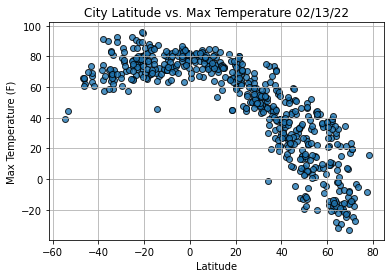

In [15]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, 
            max_temps, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig1.png')

#Show plot
plt.show()

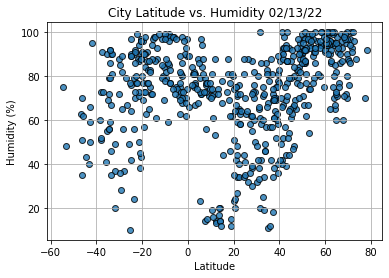

In [16]:
#Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig2.png')

#Show plot

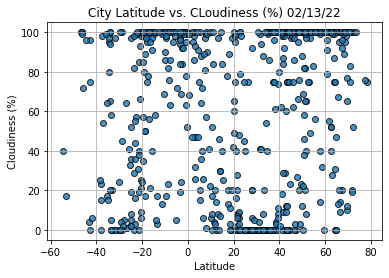

In [17]:
#Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. CLoudiness (%) '+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig3.png')

#Show plot
plt.show()

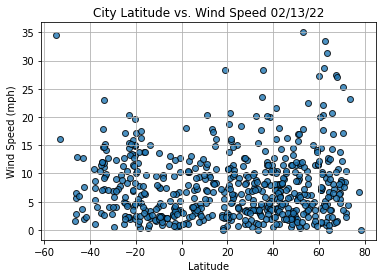

In [18]:
#Build the scatter plot for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig4.png')

#Show plot
plt.show()

In [ ]:
#Correlation

In [19]:
#Import linregress
from scipy.stats import linregress

#Create a function to perform linear regression on the weather data and plot a regression line with the equation
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    #Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
#Create Northern and Southern Hemisphere data frames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hamilton,US,2022-02-14 02:00:14,39.1834,-84.5333,21.58,78,100,1.99
3,Murakami,JP,2022-02-14 02:00:19,38.2333,139.4833,37.72,64,61,3.78
4,Talnakh,RU,2022-02-14 02:00:19,69.4865,88.3972,-8.05,70,10,8.79
6,Deputatskiy,RU,2022-02-14 02:00:20,69.3000,139.9000,-11.51,95,98,4.79
8,Huilong,CN,2022-02-14 02:00:22,31.8111,121.6550,45.99,58,0,10.09


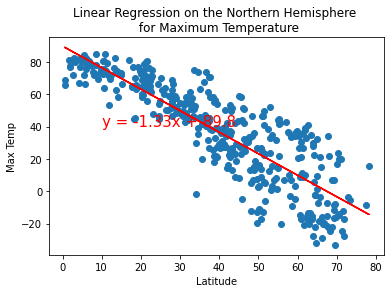

In [21]:
#Linear regression on the Northern Hemisphere (Max Temp)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (10,40))

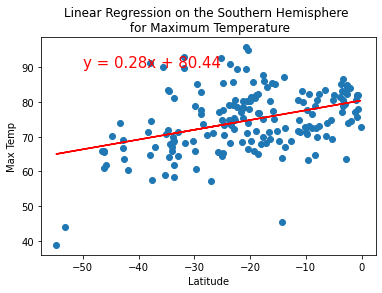

In [22]:
#Linear regression on the Southern Hemisphere (Max Temp)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (-50,90))

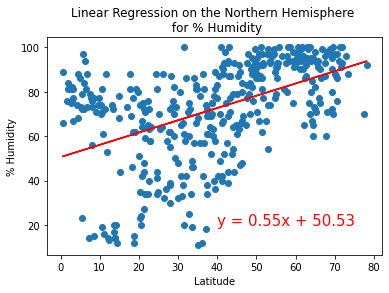

In [23]:
#Linear regression on the Northern Hemisphere (Humidity)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity', (40,20))

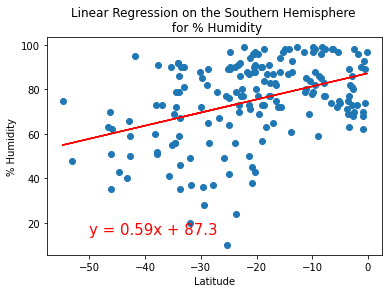

In [24]:
#Linear regression on the Southern Hemisphere (Humidity)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity', (-50,15))

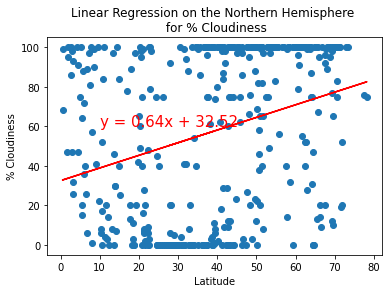

In [25]:
#Linear regression on the Northern Hemisphere (Cloudiness)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (10,60))

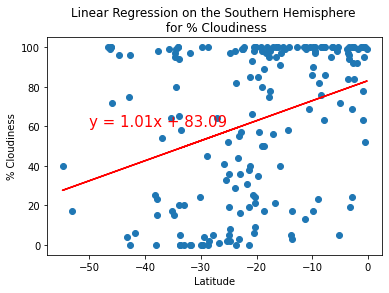

In [26]:
#Linear regression on the Southern Hemisphere (Cloudiness)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (-50,60))

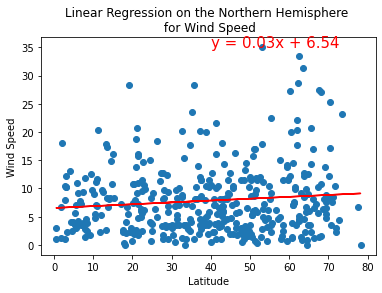

In [27]:
#Linear regression on the Northern Hemisphere (Wind Speed)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed', (40,35))

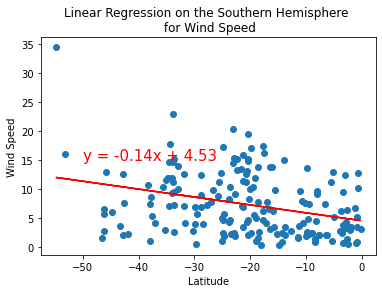

In [28]:
#Linear regression on the Southern Hemisphere (Wind Speed)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed', (-50,15))